# Exercise 7

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm
from scipy.optimize import curve_fit

In [16]:
def autocorrelation(x,size):
    autoc = np.zeros(size)
    l = x.size-size
    
    x1 = np.mean(x[:l])
    x1_2 = np.mean(x[:l]**2)
    sigma = x1_2 - x1**2
    
    for t in range(size):
        x2 = np.mean(x[t:l+t])
        x3 = np.mean( x[:l]*x[t:l+t] )
        
        autoc[t] = (x3 - x1*x2)/sigma
    
    return autoc

The graphs printed in this Jupyter Notebook are in reduced units. <br>

In this Jupyter Notebook I printed the graphs of equilibration, correlation and error over block dimension for pressure and potential energy, in addition I printed the radial distribution of the molecules. All the graphs are done for solid, liquid and gas phases.

In order to do the firsts graphs I simulated the system a with Monte Carlo algorithm and so study the correlation. Instead for the final values and the radial distribution I simulated the system both with a Monte Carlo algorithm and the Molecular Dinamics algorithm form exercise 4.

For both the algorithm I added the tail correction to pressure and potential energy.

# <span style="color:green"> Solid </span>

For the solid I used $ \delta=0.1$ in order to obtain a medium acceptance rate of $50\%$.

#### Equilibration

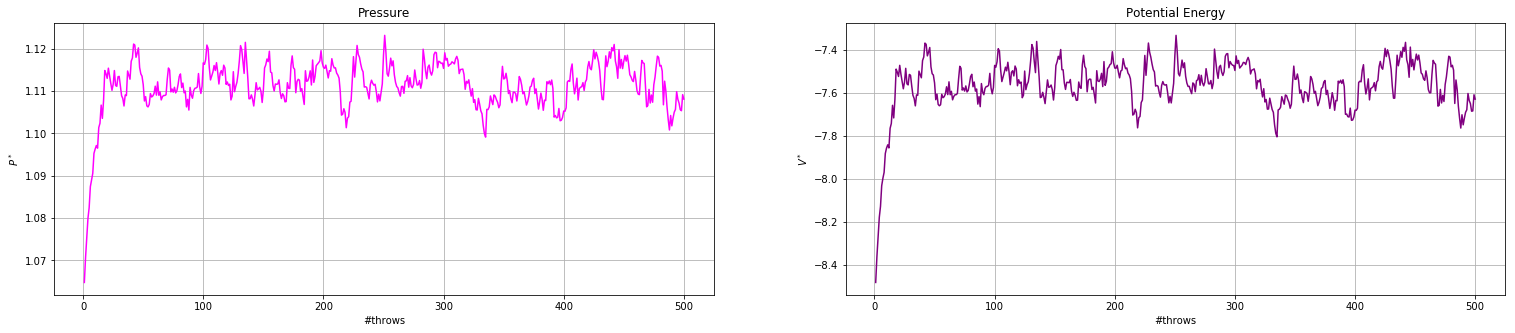

In [17]:
path_epot = "MDNVE_MCNVT/Results/Solid/Equilibration/output_epot.dat"
path_pres = "MDNVE_MCNVT/Results/Solid/Equilibration/output_pres.dat"

x_epot, epot = np.loadtxt(path_epot, usecols=(0,1), unpack='true')
x_pres, pres = np.loadtxt(path_pres, usecols=(0,1), unpack='true')


fig, (pres_plot, epot_plot) = plt.subplots(1, 2, figsize=(26,5))

epot_plot.plot(x_epot, epot, color="purple")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("$V^*$")
epot_plot.set_title("Potential Energy")
epot_plot.grid(True)

pres_plot.plot(x_pres, pres, color="fuchsia" )
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("$P^*$")
pres_plot.set_title("Pressure")
pres_plot.grid(True)

plt.show()

The Monte Carlo algorithm needs less steps to equilibrate the sistem than the Molecula Dinamics algorithm. In addition the MC gives more frequent oscillations but with less amplitude.

#### Correlation

In [20]:
path_epot = "MDNVE_MCNVT/Results/Solid/EquilibratedAutoc/output_epot.dat"
path_pres = "MDNVE_MCNVT/Results/Solid/EquilibratedAutoc/output_pres.dat"

x_epot, epot = np.loadtxt(path_epot, usecols=(0,1), unpack='true')
x_pres, pres = np.loadtxt(path_pres, usecols=(0,1), unpack='true')


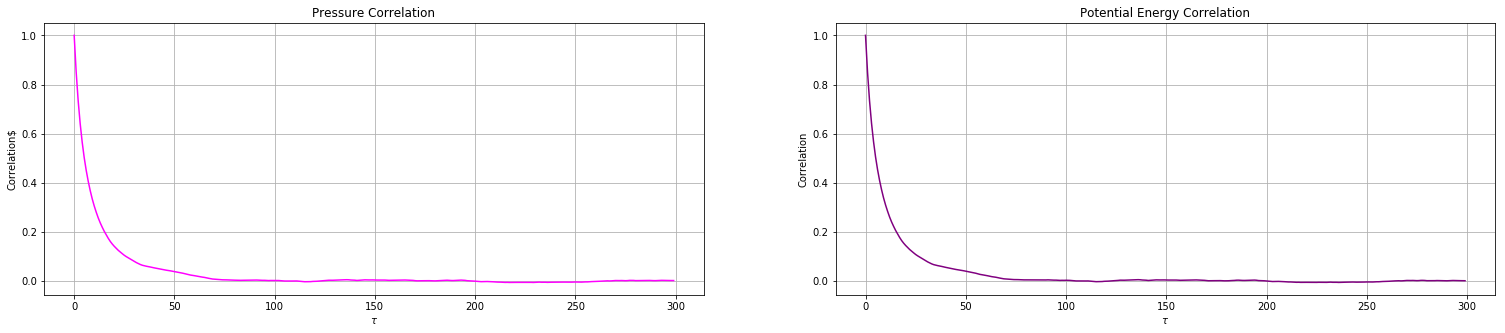

In [21]:
autoc_pres = autocorrelation(pres,300)
autoc_epot = autocorrelation(epot,300)

fig, (pres_plot, epot_plot) = plt.subplots(1, 2, figsize=(26,5))

epot_plot.plot(autoc_epot, color="purple")
epot_plot.set_xlabel("$\\tau$")
epot_plot.set_ylabel("Correlation")
epot_plot.set_title("Potential Energy Correlation")
epot_plot.grid(True)

pres_plot.plot(autoc_pres, color="fuchsia" )
pres_plot.set_xlabel("$\\tau$")
pres_plot.set_ylabel("Correlation$")
pres_plot.set_title("Pressure Correlation")
pres_plot.grid(True)


I have to check the correlation between the values at different steps in order to understand how long the block have to be. <br>
I want to have a block lenght higher than the correlation lenght in order to obtain uncorrelated means.

#### Error over block size

In [24]:
L = np.array([
    i
  for i in range(1,5001) if 50000%i == 0
])

epot_block_errors = np.zeros(L.size)

for l in range(L.size):
    
    epot_block_errors[l] = (np.mean( epot[:int(L[l])]**2 ) - np.mean( epot[:int(L[l])] )**2)
    

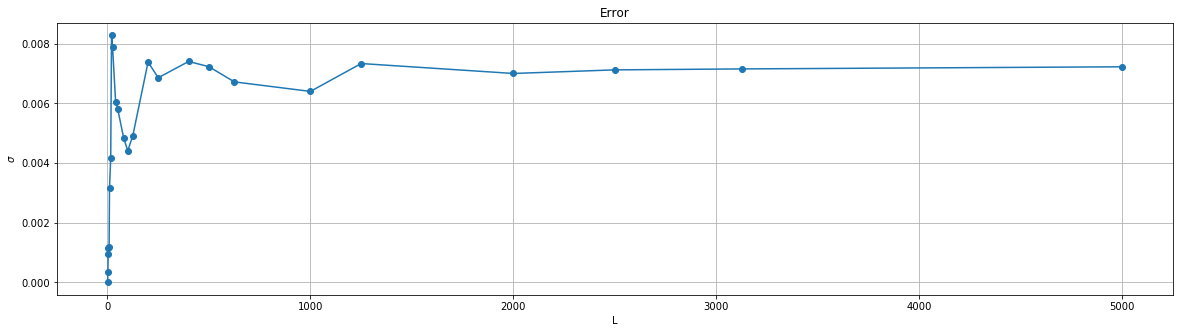

In [25]:
plt.figure(figsize=(20,5))
plt.plot(L,epot_block_errors,marker="o")
plt.title("Error")
plt.xlabel("L")
plt.ylabel("$\sigma$")
plt.grid(True)

plt.show()

The graph shows that the error becomes nearly constant after the block lenght of 1500 so to have uncorrelated data I have to use an higher L.

#### Final values and Radial distribution

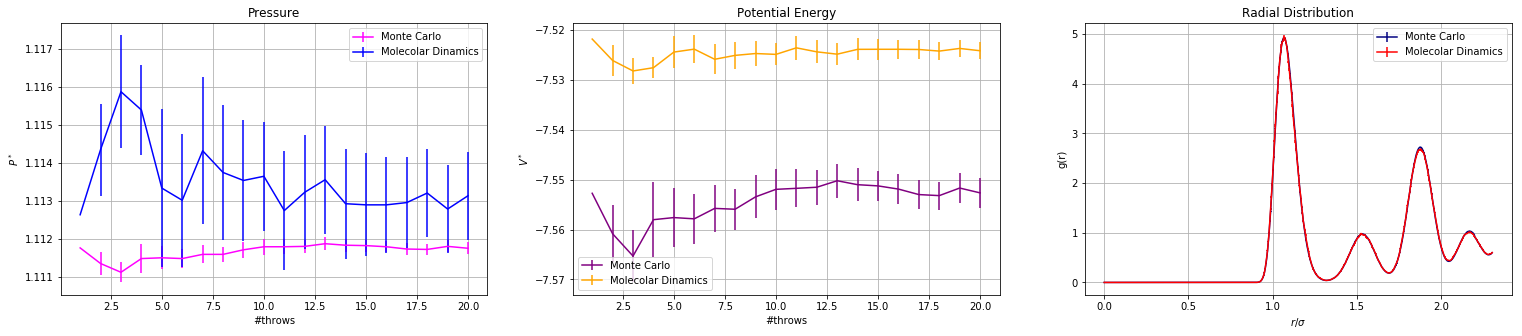

In [60]:
path_g_MC = "MDNVE_MCNVT/Results/Solid/RadialDistribMC/output_gdir.dat"
path_pres_MC = "MDNVE_MCNVT/Results/Solid/EquilibratedBlocksMC/output_pres.dat"
path_epot_MC = "MDNVE_MCNVT/Results/Solid/EquilibratedBlocksMC/output_epot.dat"

path_g_MD = "MDNVE_MCNVT/Results/Solid/RadialDistribMD/output_gdir.dat"
path_pres_MD = "MDNVE_MCNVT/Results/Solid/EquilibratedBlocksMD/output_pres.dat"
path_epot_MD = "MDNVE_MCNVT/Results/Solid/EquilibratedBlocksMD/output_epot.dat"

bins_MC, gdir_MC, err_gdir_MC = np.loadtxt(path_g_MC, usecols=(0,1,2), unpack=True)
x_pres_MC, pres_MC, err_pres_MC = np.loadtxt(path_pres_MC, usecols=(0,2,3), unpack=True)
x_epot_MC, epot_MC, err_epot_MC = np.loadtxt(path_epot_MC, usecols=(0,2,3), unpack=True)

bins_MD, gdir_MD, err_gdir_MD = np.loadtxt(path_g_MD, usecols=(0,1,2), unpack=True)
x_pres_MD, pres_MD, err_pres_MD = np.loadtxt(path_pres_MD, usecols=(0,2,3), unpack=True)
x_epot_MD, epot_MD, err_epot_MD = np.loadtxt(path_epot_MD, usecols=(0,2,3), unpack=True)

fig, (pres_plot, epot_plot, g_plot) = plt.subplots(1,3,figsize=(26,5))

epot_plot.errorbar(x_epot_MC, epot_MC, yerr=err_epot_MC, color="purple", label="Monte Carlo")
epot_plot.errorbar(x_epot_MD, epot_MD, yerr=err_epot_MD, color="orange", label="Molecolar Dinamics")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("$V^*$")
epot_plot.set_title("Potential Energy")
epot_plot.legend()
epot_plot.grid(True)

pres_plot.errorbar(x_pres_MC, pres_MC, yerr=err_pres_MC, color="fuchsia", label="Monte Carlo")
pres_plot.errorbar(x_pres_MD, pres_MD, yerr=err_pres_MD, color="blue", label="Molecolar Dinamics")
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("$P^*$")
pres_plot.set_title("Pressure")
pres_plot.legend()
pres_plot.grid(True)

g_plot.errorbar(bins_MC,gdir_MC,yerr=err_gdir_MC, color="navy", label="Monte Carlo")
g_plot.errorbar(bins_MD,gdir_MD,yerr=err_gdir_MD, color="red", label="Molecolar Dinamics")
g_plot.set_xlabel("$r/ \sigma$")
g_plot.set_ylabel("g(r)")
g_plot.set_title("Radial Distribution")
g_plot.legend()
g_plot.grid(True)

Pressure outputs of the MC and the MD are consistent, and the graph shows MC has smaller errors than MD. <br>
Instead potential energy data doesn't match for the two algorithm and have comparable errors.

The radial distribution is the same for both MC and MD and shows peaks at $ 1, \sqrt{2}, \sqrt{3}$. Those distances are the lenghts of the edge of the cube, of the diagonal of the square and of the diagonal of the cube and show the regularity of a solid phase. 

# <span style="color:green"> Liquid </span>

For the liquid I used $ \delta=0.2$, due to the obtained results, probably the medium acceptance rate was a little higer than $50\%$.

#### Equilibration

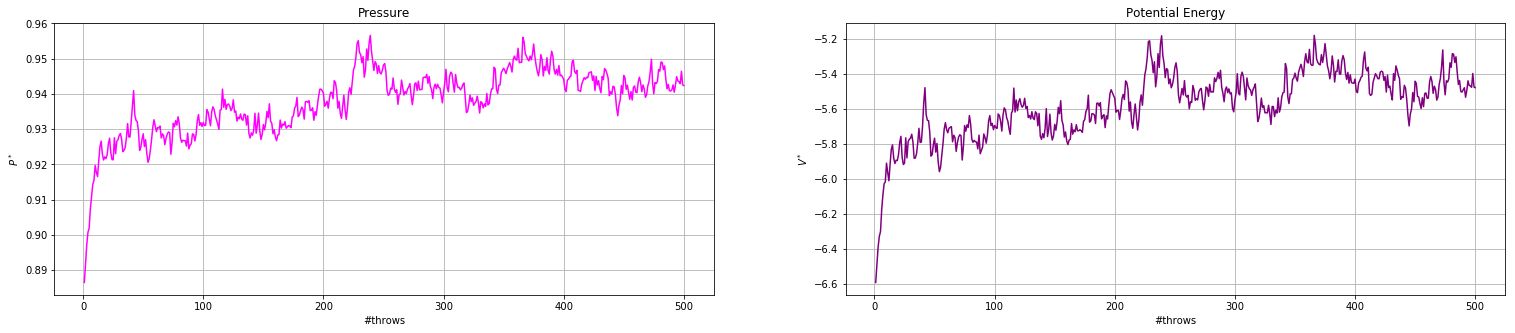

In [31]:
path_epot = "MDNVE_MCNVT/Results/Liquid/Equilibration/output_epot.dat"
path_pres = "MDNVE_MCNVT/Results/Liquid/Equilibration/output_pres.dat"

x_epot, epot = np.loadtxt(path_epot, usecols=(0,1), unpack='true')
x_pres, pres = np.loadtxt(path_pres, usecols=(0,1), unpack='true')


fig, (pres_plot, epot_plot) = plt.subplots(1, 2, figsize=(26,5))

epot_plot.plot(x_epot, epot, color="purple")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("$V^*$")
epot_plot.set_title("Potential Energy")
epot_plot.grid(True)

pres_plot.plot(x_pres, pres, color="fuchsia" )
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("$P^*$")
pres_plot.set_title("Pressure")
pres_plot.grid(True)

plt.show()

The liquid phase needs a bit more steps to equilibrate than the solid one, because also in this case the liquid have to "melt".

#### Correlation

In [32]:
path_epot = "MDNVE_MCNVT/Results/Liquid/EquilibratedAutoc/output_epot.dat"
path_pres = "MDNVE_MCNVT/Results/Liquid/EquilibratedAutoc/output_pres.dat"

x_epot, epot = np.loadtxt(path_epot, usecols=(0,1), unpack='true')
x_pres, pres = np.loadtxt(path_pres, usecols=(0,1), unpack='true')


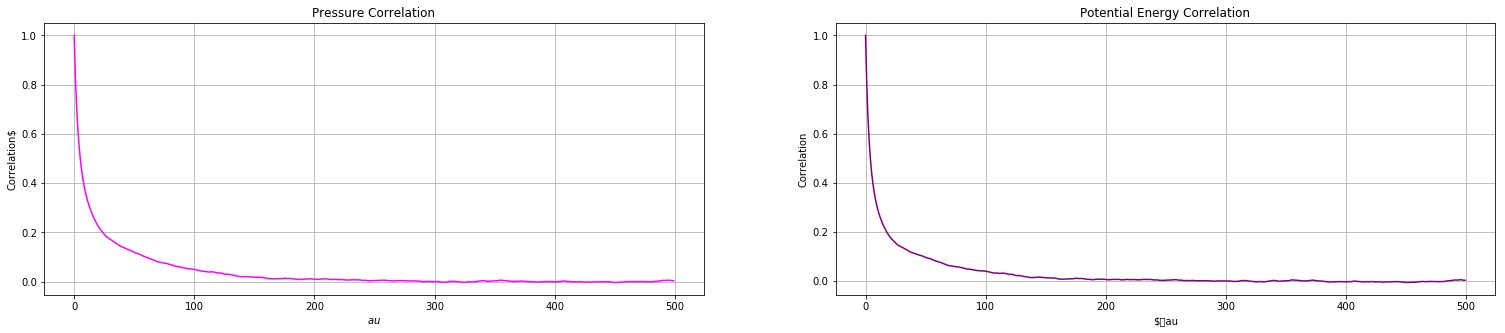

In [33]:
autoc_pres = autocorrelation(pres,500)
autoc_epot = autocorrelation(epot,500)

fig, (pres_plot, epot_plot) = plt.subplots(1, 2, figsize=(26,5))

epot_plot.plot(autoc_epot, color="purple")
epot_plot.set_xlabel("$\tau")
epot_plot.set_ylabel("Correlation")
epot_plot.set_title("Potential Energy Correlation")
epot_plot.grid(True)

pres_plot.plot(autoc_pres, color="fuchsia" )
pres_plot.set_xlabel("$\tau$")
pres_plot.set_ylabel("Correlation$")
pres_plot.set_title("Pressure Correlation")
pres_plot.grid(True)

Those graphs shows that the liquid phase is more correlated than the solid one in contrast to what one may expect. This could happen due to the size of the $\delta$. <br>
In fact at higher $\delta$ a system should be less correlated, but his lenght depends on the system and its probability distribution. So a $\delta=0.1$ in a solid phase can lead to a less correlated system than a $\delta=0.2$ liquid phase. <br> This depends on the acceptance rate, that I tried to set to $50\%$ but was probably higher for the liquid phase.

#### Error over block size

In [34]:
L = np.array([
    i
  for i in range(1,5001) if 50000%i == 0
])

epot_block_errors = np.zeros(L.size)

for l in range(L.size):
    
    epot_block_errors[l] = (np.mean( epot[:int(L[l])]**2 ) - np.mean( epot[:int(L[l])] )**2)

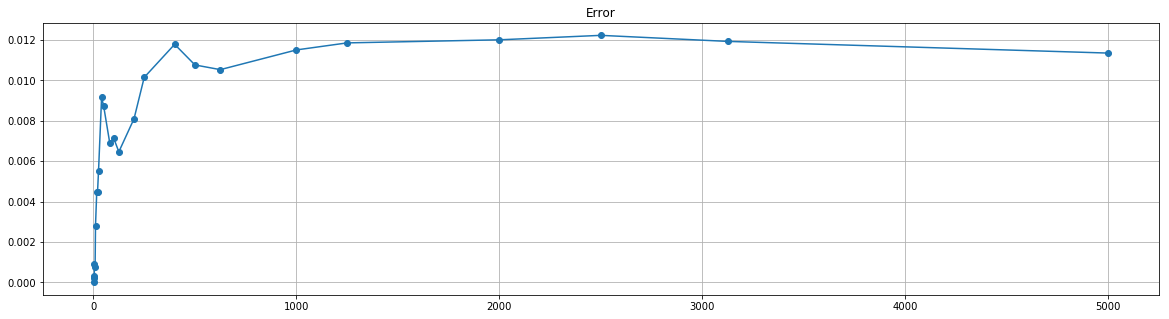

In [35]:
plt.figure(figsize=(20,5))
plt.plot(L,epot_block_errors,marker="o")
plt.title("Error")
plt.grid(True)

plt.show()

As in the solid, I have to set L big enought to have constant error.

#### Final values and Radial distribution

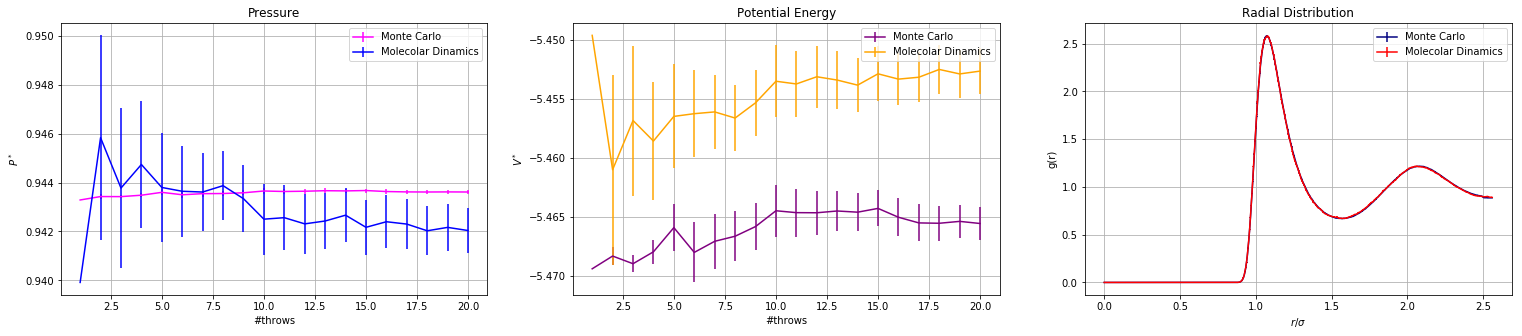

In [38]:
path_g_MC = "MDNVE_MCNVT/Results/Liquid/RadialDistribMC/output_gdir.dat"
path_pres_MC = "MDNVE_MCNVT/Results/Liquid/EquilibratedBlocksMC/output_pres.dat"
path_epot_MC = "MDNVE_MCNVT/Results/Liquid/EquilibratedBlocksMC/output_epot.dat"

path_g_MD = "MDNVE_MCNVT/Results/Liquid/RadialDistribMD/output_gdir.dat"
path_pres_MD = "MDNVE_MCNVT/Results/Liquid/EquilibratedBlocksMD/output_pres.dat"
path_epot_MD = "MDNVE_MCNVT/Results/Liquid/EquilibratedBlocksMD/output_epot.dat"

bins_MC, gdir_MC, err_gdir_MC = np.loadtxt(path_g_MC, usecols=(0,1,2), unpack=True)
x_pres_MC, pres_MC, err_pres_MC = np.loadtxt(path_pres_MC, usecols=(0,2,3), unpack=True)
x_epot_MC, epot_MC, err_epot_MC = np.loadtxt(path_epot_MC, usecols=(0,2,3), unpack=True)

bins_MD, gdir_MD, err_gdir_MD = np.loadtxt(path_g_MD, usecols=(0,1,2), unpack=True)
x_pres_MD, pres_MD, err_pres_MD = np.loadtxt(path_pres_MD, usecols=(0,2,3), unpack=True)
x_epot_MD, epot_MD, err_epot_MD = np.loadtxt(path_epot_MD, usecols=(0,2,3), unpack=True)

fig, (pres_plot, epot_plot, g_plot) = plt.subplots(1,3,figsize=(26,5))

epot_plot.errorbar(x_epot_MC, epot_MC, yerr=err_epot_MC, color="purple", label="Monte Carlo")
epot_plot.errorbar(x_epot_MD, epot_MD, yerr=err_epot_MD, color="orange", label="Molecolar Dinamics")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("$V^*$")
epot_plot.set_title("Potential Energy")
epot_plot.legend()
epot_plot.grid(True)

pres_plot.errorbar(x_pres_MC, pres_MC, yerr=err_pres_MC, color="fuchsia", label="Monte Carlo")
pres_plot.errorbar(x_pres_MD, pres_MD, yerr=err_pres_MD, color="blue", label="Molecolar Dinamics")
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("$P^*$")
pres_plot.set_title("Pressure")
pres_plot.legend()
pres_plot.grid(True)

g_plot.errorbar(bins_MC,gdir_MC,yerr=err_gdir_MC, color="navy", label="Monte Carlo")
g_plot.errorbar(bins_MD,gdir_MD,yerr=err_gdir_MD, color="red", label="Molecolar Dinamics")
g_plot.set_xlabel("$r/ \sigma$")
g_plot.set_ylabel("g(r)")
g_plot.set_title("Radial Distribution")
g_plot.legend()
g_plot.grid(True)

The pressure and the potential energy from MC and MD behave as in the solid phase. <br>

The radial distribution shows how the liquid phase is less organized than the solid one, in fact there's a peak near at $ \dfrac{r}{\sigma} = 1$ and for higer distance the molecules try to be indepedent and the $g(r)$ oscillates around 1 with no high peaks. 

# <span style="color:green"> Gas </span>

For the gas I used $ \delta=5$. <br>
In this case the acceptance rate doesn't go under $60\%$ so I choose an high $\delta$ in order to have weak correlation.
#### Equilibration

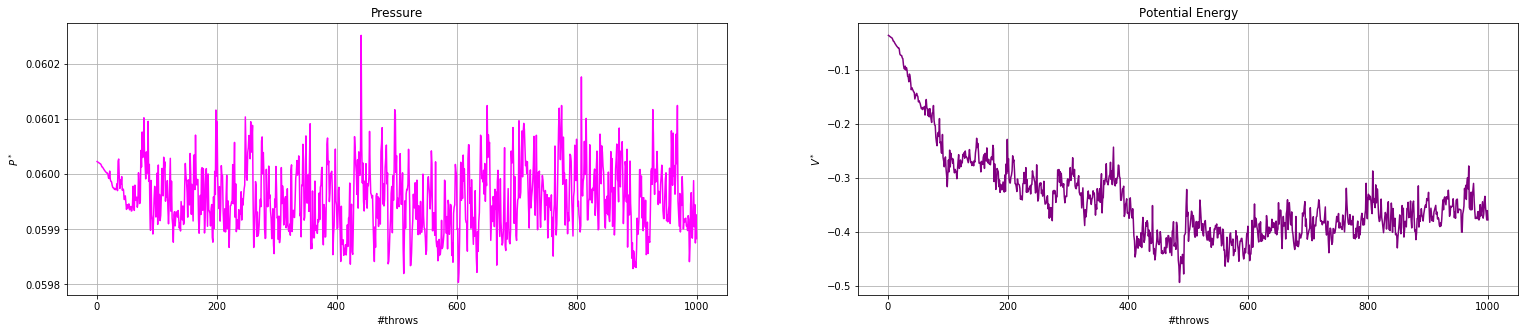

In [39]:
path_epot = "MDNVE_MCNVT/Results/Gas/Equilibration/output_epot.dat"
path_pres = "MDNVE_MCNVT/Results/Gas/Equilibration/output_pres.dat"

x_epot, epot = np.loadtxt(path_epot, usecols=(0,1), unpack='true')
x_pres, pres = np.loadtxt(path_pres, usecols=(0,1), unpack='true')


fig, (pres_plot, epot_plot) = plt.subplots(1, 2, figsize=(26,5))

epot_plot.plot(x_epot, epot, color="purple")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("$V^*$")
epot_plot.set_title("Potential Energy")
epot_plot.grid(True)

pres_plot.plot(x_pres, pres, color="fuchsia" )
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("$P^*$")
pres_plot.set_title("Pressure")
pres_plot.grid(True)

plt.show()

The gas phase equilibrate in a lot more steps than the liquid and the solid ones.

#### Correlation

In [40]:
path_epot = "MDNVE_MCNVT/Results/Gas/EquilibratedAutoc/output_epot.dat"
path_pres = "MDNVE_MCNVT/Results/Gas/EquilibratedAutoc/output_pres.dat"

x_epot, epot = np.loadtxt(path_epot, usecols=(0,1), unpack='true')
x_pres, pres = np.loadtxt(path_pres, usecols=(0,1), unpack='true')

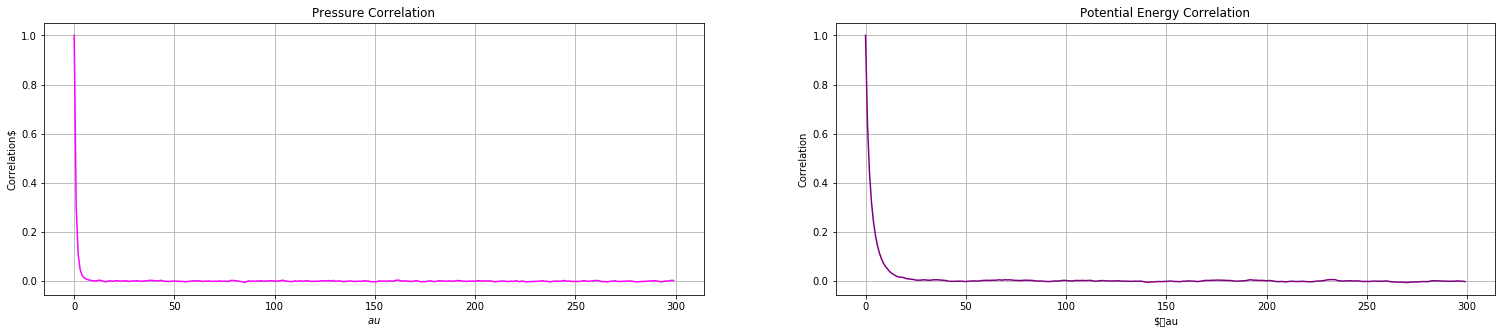

In [41]:
autoc_pres = autocorrelation(pres,300)
autoc_epot = autocorrelation(epot,300)

fig, (pres_plot, epot_plot) = plt.subplots(1, 2, figsize=(26,5))

epot_plot.plot(autoc_epot, color="purple")
epot_plot.set_xlabel("$\tau")
epot_plot.set_ylabel("Correlation")
epot_plot.set_title("Potential Energy Correlation")
epot_plot.grid(True)

pres_plot.plot(autoc_pres, color="fuchsia" )
pres_plot.set_xlabel("$\tau$")
pres_plot.set_ylabel("Correlation$")
pres_plot.set_title("Pressure Correlation")
pres_plot.grid(True)

The data become uncorrelated after very few steps, due to the high $\delta$.

#### Error over block size

In [42]:
L = np.array([
    i
  for i in range(1,5001) if 50000%i == 0
])

epot_block_errors = np.zeros(L.size)

for l in range(L.size):
    
    epot_block_errors[l] = (np.mean( epot[:int(L[l])]**2 ) - np.mean( epot[:int(L[l])] )**2)

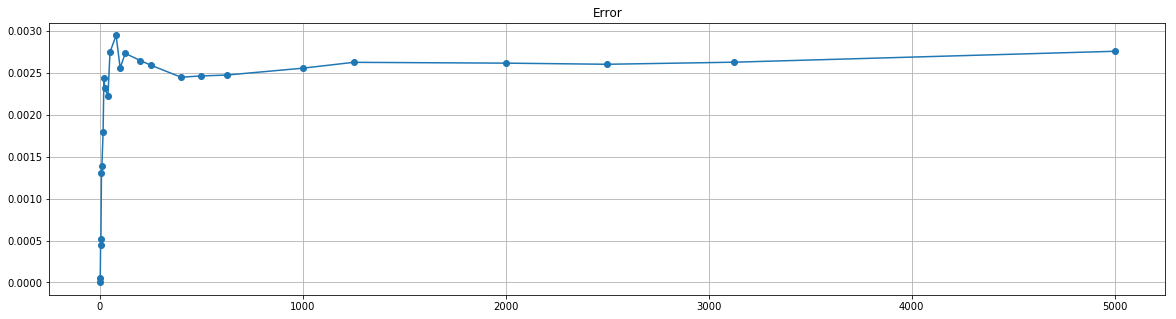

In [43]:
plt.figure(figsize=(20,5))
plt.plot(L,epot_block_errors,marker="o")
plt.title("Error")
plt.grid(True)

plt.show()

Low correlation implies that the error becomes neraly constant al low block size.

#### Final values and Radial distribution

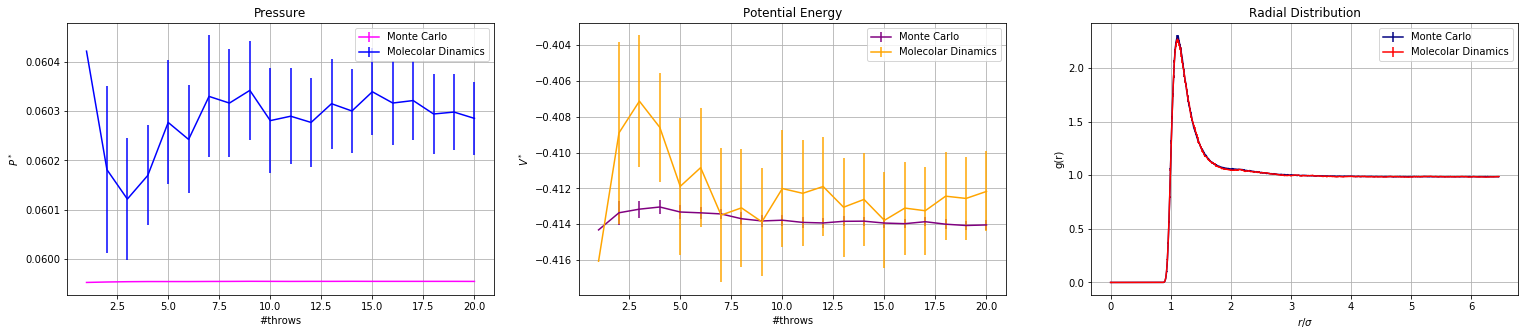

In [56]:
path_g_MC = "MDNVE_MCNVT/Results/Gas/RadialDistribMC/output_gdir.dat"
path_pres_MC = "MDNVE_MCNVT/Results/Gas/EquilibratedBlocksMC/output_pres.dat"
path_epot_MC = "MDNVE_MCNVT/Results/Gas/EquilibratedBlocksMC/output_epot.dat"

path_g_MD = "MDNVE_MCNVT/Results/Gas/RadialDistribMD/output_gdir.dat"
path_pres_MD = "MDNVE_MCNVT/Results/Gas/EquilibratedBlocksMD/output_pres.dat"
path_epot_MD = "MDNVE_MCNVT/Results/Gas/EquilibratedBlocksMD/output_epot.dat"

bins_MC, gdir_MC, err_gdir_MC = np.loadtxt(path_g_MC, usecols=(0,1,2), unpack=True)
x_pres_MC, pres_MC, err_pres_MC = np.loadtxt(path_pres_MC, usecols=(0,2,3), unpack=True)
x_epot_MC, epot_MC, err_epot_MC = np.loadtxt(path_epot_MC, usecols=(0,2,3), unpack=True)

bins_MD, gdir_MD, err_gdir_MD = np.loadtxt(path_g_MD, usecols=(0,1,2), unpack=True)
x_pres_MD, pres_MD, err_pres_MD = np.loadtxt(path_pres_MD, usecols=(0,2,3), unpack=True)
x_epot_MD, epot_MD, err_epot_MD = np.loadtxt(path_epot_MD, usecols=(0,2,3), unpack=True)

fig, (pres_plot, epot_plot, g_plot) = plt.subplots(1,3,figsize=(26,5))

epot_plot.errorbar(x_epot_MC, epot_MC, yerr=err_epot_MC, color="purple", label="Monte Carlo")
epot_plot.errorbar(x_epot_MD, epot_MD, yerr=err_epot_MD, color="orange", label="Molecolar Dinamics")
epot_plot.set_xlabel("#throws")
epot_plot.set_ylabel("$V^*$")
epot_plot.set_title("Potential Energy")
epot_plot.legend()
epot_plot.grid(True)

pres_plot.errorbar(x_pres_MC, pres_MC, yerr=err_pres_MC, color="fuchsia", label="Monte Carlo")
pres_plot.errorbar(x_pres_MD, pres_MD, yerr=err_pres_MD, color="blue", label="Molecolar Dinamics")
pres_plot.set_xlabel("#throws")
pres_plot.set_ylabel("$P^*$")
pres_plot.set_title("Pressure")
pres_plot.legend()
pres_plot.grid(True)

g_plot.errorbar(bins_MC,gdir_MC,yerr=err_gdir_MC, color="navy", label="Monte Carlo")
g_plot.errorbar(bins_MD,gdir_MD,yerr=err_gdir_MD, color="red", label="Molecolar Dinamics")
g_plot.set_xlabel("$r/ \sigma$")
g_plot.set_ylabel("g(r)")
g_plot.set_title("Radial Distribution")
g_plot.legend()
g_plot.grid(True)

Unlike the liquid and the solid phases, the pressure of the gas one shows incompatible MC and MD data but on the other hand the potential energies match togheter.

The radial distribution shows a lonely peak at $ \dfrac{r}{\sigma} = 1$ and goes to 1 for values after 2, this behaviour means that the molecules in the gas phase are completly independent.